In [1]:
import pandas as pd

c:\Users\82106\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\82106\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [28]:
df_factory = pd.read_csv(r'C:\Users\82106\Desktop\안산 공모전\데이터\경기도 안산시_공장등록 현황_20240213.csv', encoding='cp949')
df_factory

,시군구,회사명,도로명주소,데이터기준일자
0,안산시,(주)가가,"경기도 안산시 단원구 새뿔길 22-7 (신길동, 금호유통)",2024-02-13
1,안산시,(주)고려정공,"경기도 안산시 상록구 안산테콤길 43 (사사동, 고려정공)",2024-02-13
2,안산시,(주)고향미트,"경기도 안산시 상록구 소학1길 6-10, 3층 (팔곡이동)",2024-02-13
3,안산시,(주)광일시스템,경기도 안산시 상록구 담원2길 7 (팔곡이동),2024-02-13
4,안산시,(주)글로벌원,"경기도 안산시 상록구 도금단지1길 54, 에이동 (팔곡이동, 대호금속)",2024-02-13
...,...,...,...,...
435,안산시,호산제과,경기도 안산시 상록구 선진안길 39 (사동),2024-02-13
436,안산시,화림이앤지주식회사,"경기도 안산시 상록구 각골동로 33, 지하1층 (본오동)",2024-02-13
437,안산시,화성공업,경기도 안산시 상록구 도금단지2길 30-2 (팔곡이동),2024-02-13
438,안산시,효일공업(주),"경기도 안산시 상록구 영화길 16 (사동, 효일공업(주))",2024-02-13


In [29]:
# 도로명 주소에서 괄호 안의 '동' 추출
df_factory['동'] = df_factory['도로명주소'].str.extract(r'\(([^,]*동)')

# 동 이름 정리 및 정규화
def clean_dong_name(dong_name):
    if pd.isna(dong_name):
        return None
    
    # 순수한 '동'으로 끝나는 부분만 추출
    import re
    # '동'으로 끝나는 단어 찾기
    match = re.search(r'(\w+동)', str(dong_name))
    if match:
        return match.group(1)
    return None

# 동 이름 정리 적용
df_factory['동'] = df_factory['동'].apply(clean_dong_name)

df_factory = df_factory.dropna(subset=['동'])  # None 값 제거
df_factory = df_factory[df_factory['동'] != 'A동'] 

df_factory['동'].unique()

array(['신길동', '사사동', '팔곡이동', '원곡동', '사동', '팔곡일동', '건건동', '이동', '장하동',
       '화정동', '부곡동', '본오동', '대부남동', '양상동', '장상동', '와동', '선부동', '일동',
       '초지동', '고잔동', '월피동', '대부동동', '대부북동', '수암동'], dtype=object)

In [30]:
# 동명 통합 규칙 적용
merge_rules = {
    '사사동': '반월동',
    '팔곡일동': '반월동', 
    '팔곡이동': '본오동',
    '건건동': '반월동',
    '수암동': '안산동',
    '장상동': '안산동',
    '장하동': '안산동',
    '신길동': '원곡동',
    '화정동': '선부동',
    '대부남동': '대부동',
    '대부북동': '대부동',
    '대부동동' : '대부동',
    '양상동': '안산동'
}

# 동명 통합 적용
df_factory['동'] = df_factory['동'].replace(merge_rules)

df_factory['동'].unique()

array(['원곡동', '반월동', '본오동', '사동', '이동', '안산동', '선부동', '부곡동', '대부동', '와동',
       '일동', '초지동', '고잔동', '월피동'], dtype=object)

In [31]:
#한글폰트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf' 
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

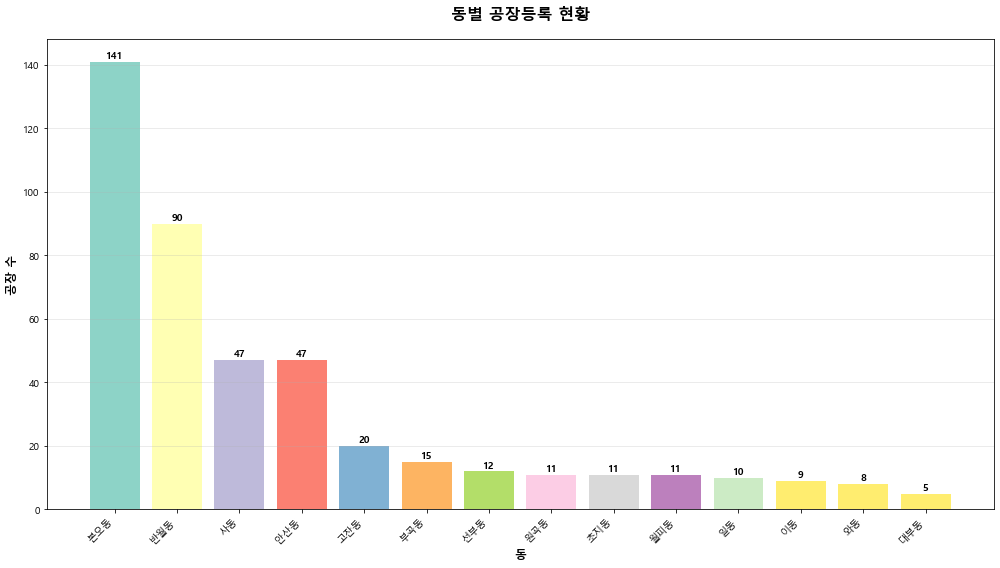

In [32]:
# 동별 공장 개수 집계
dong_factory_counts = df_factory['동'].value_counts()

# 시각화
plt.figure(figsize=(14, 8))
bars = plt.bar(dong_factory_counts.index, dong_factory_counts.values, 
               color=plt.cm.Set3(range(len(dong_factory_counts))))

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.title('동별 공장등록 현황', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('동', fontsize=12, fontweight='bold')
plt.ylabel('공장 수', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [33]:
dong_factory_counts

동
본오동    141
반월동     90
사동      47
안산동     47
고잔동     20
부곡동     15
선부동     12
원곡동     11
초지동     11
월피동     11
일동      10
이동       9
와동       8
대부동      5
Name: count, dtype: int64

In [36]:
merged_data = pd.read_csv('merged_data.csv', encoding='utf-8-sig')

In [37]:
factory_counts_df = dong_factory_counts.reset_index()
factory_counts_df.columns = ['동', '공장 개수']

# merged_data와 공장 개수 병합
merged_data = pd.merge(
    merged_data, 
    factory_counts_df, 
    on='동', 
    how='left'
).fillna(0)

# merged_data에서 숫자형 컬럼의 소수점 제거
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    merged_data[col] = merged_data[col].astype(int)

merged_data

,동,음식물 폐기물 총무게,대형폐기물 관리주소 개수,토양오염 관리시설 개수,하천 점용 개수,토양 오염도 점수,폐수배출 종합점수,대기오염 종합점수,공장 개수
0,고잔동,3145708,132,3,0,0,0,0,20
1,대부동,5703940,560,12,0,0,0,0,5
2,반월동,1239451,92,5,1,0,1,0,90
3,백운동,2176200,106,0,0,0,0,0,0
4,본오동,2502583,301,4,0,0,0,0,141
5,부곡동,1739120,109,3,0,0,1,0,15
6,사동,5834368,232,7,0,0,3,2,47
7,선부동,4966509,183,9,0,0,1,0,12
8,성포동,2664230,22,42,0,8,0,0,0
9,안산동,147888,86,28,1,0,0,0,47


In [38]:
merged_data.to_csv('안산시 지역별 오염지수.csv', encoding='utf-8-sig', index=False)